In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

In [2]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [3]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
# соединим таблицу с рейтингами и названиями фильмов
joined_ratings = ratings.join(movies.set_index('movieId'), on='movieId')

In [8]:
joined_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


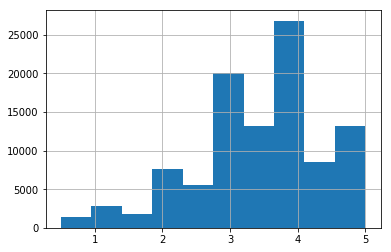

In [9]:
# посмотрим на гистограмму распределения оценок
joined_ratings.rating.hist()

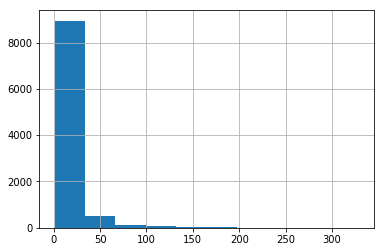

In [10]:
# гистограмма по количеству оценок на фильм
joined_ratings.groupby('title').rating.count().hist()

In [11]:
# достанем топ фильмов по оценкам
top_films = joined_ratings.groupby('title')[['rating']].mean().sort_values('rating', ascending=False)
top_films.head(10)

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
"Thin Line Between Love and Hate, A (1996)",5.0
Lesson Faust (1994),5.0
Eva (2011),5.0
Who Killed Chea Vichea? (2010),5.0


In [12]:
# возьмем только фильмы с наивысшей средней оценкой в 5.0
films_with_highest_marks = top_films.iloc[np.where(top_films.rating == 5.0)].index

In [13]:
# достанем по каждому фильму количество рейтингов
title_num_ratings = {}

for title, group in tqdm_notebook(joined_ratings.groupby('title')):
    title_num_ratings[title] = group.userId.unique().shape[0]

In [14]:
# выведем топ фильмов со средней оценкой в 5.0 по количеству отзывов и увидим, что рейтинг получается не самый удачный
sorted([(title_num_ratings[f], f) for f in films_with_highest_marks], key=lambda x: x[0], reverse=True)[:10]

[(2, 'Lesson Faust (1994)'),
 (2, 'Heidi Fleiss: Hollywood Madam (1995)'),
 (2, 'Enter the Void (2009)'),
 (2, 'Lamerica (1994)'),
 (2,
  "Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976)"),
 (2, 'Come and See (Idi i smotri) (1985)'),
 (2, 'Belle époque (1992)'),
 (1, 'Gena the Crocodile (1969)'),
 (1, 'True Stories (1986)'),
 (1, 'Cosmic Scrat-tastrophe (2015)')]

### Приняли решение сортировать фильмы по следующей метрике: средняя оценка фильма, умноженная на нормированное количество рейтингов

In [15]:
# достанем простые статистики по количеству рейтингов
min_num_ratings = np.min([title_num_ratings[f] for f in title_num_ratings.keys()])
max_num_ratings = np.max([title_num_ratings[f] for f in title_num_ratings.keys()])
mean_num_ratings = np.mean([title_num_ratings[f] for f in title_num_ratings.keys()])
median_num_ratings = np.median([title_num_ratings[f] for f in title_num_ratings.keys()])

In [16]:
print(min_num_ratings)
print(max_num_ratings)
print(mean_num_ratings)
print(median_num_ratings)

1
329
10.374729910484618
3.0


In [17]:
# считаем средний рейтинг на каждый фильм
title_mean_rating = {}

for title, group in tqdm_notebook(joined_ratings.groupby('title')):
    title_mean_rating[title] = group.rating.mean()

In [18]:
film_with_our_mark = []

# посчитаем нашу метрику для каждого фильма из датасета
for f in title_num_ratings.keys():
    film_with_our_mark.append(
        (f, title_mean_rating[f] * (title_num_ratings[f] - mean_num_ratings) / (max_num_ratings - min_num_ratings))
    )

In [19]:
# выводим топ 20 и получилось уже очень неплохо
list(sorted(film_with_our_mark, key=lambda x: x[1], reverse=True))[:20]

[('Shawshank Redemption, The (1994)', 4.140396622352077),
 ('Forrest Gump (1994)', 4.04511657667948),
 ('Pulp Fiction (1994)', 3.795599234431761),
 ('Matrix, The (1999)', 3.4207454409691413),
 ('Silence of the Lambs, The (1991)', 3.4080113927564395),
 ('Star Wars: Episode IV - A New Hope (1977)', 3.103974793934813),
 ('Braveheart (1995)', 2.7855877015865484),
 ('Fight Club (1999)', 2.7047848943888955),
 ("Schindler's List (1993)", 2.7002035552689096),
 ('Jurassic Park (1993)', 2.6024230574258618),
 ('Terminator 2: Judgment Day (1991)', 2.5862869902088406),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 2.5785484011187134),
 ('Usual Suspects, The (1995)', 2.5016296926169597),
 ('Toy Story (1995)', 2.4461018531687673),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  2.4324644021391335),
 ('American Beauty (1999)', 2.394561678011029),
 ('Godfather, The (1972)', 2.375006509125951),
 ('Lord of the Rings: The Fellowship of the Ring, The (2001

### Появилась гипотеза использовать теги в ранжировании фильмов, решили считать не только количество отзывов, а ещё и количество проставленных тегов на фильм

In [20]:
# соединим уже созданную таблицу с таблицей с проставленными тегами по фильмам
joined_with_tags = joined_ratings.join(tags.set_index('movieId'), on='movieId', lsuffix='_left', rsuffix='_right')

In [21]:
# достанем по каждому фильму количество рейтингов
title_num_actions = {}

for title, group in tqdm_notebook(joined_with_tags.groupby('title')):
    title_num_actions[title] = group.shape[0]

In [22]:
min_num_actions = np.min([title_num_actions[f] for f in title_num_actions.keys()])
max_num_actions = np.max([title_num_actions[f] for f in title_num_actions.keys()])
mean_num_actions = np.mean([title_num_actions[f] for f in title_num_actions.keys()])
median_num_actions = np.median([title_num_actions[f] for f in title_num_actions.keys()])

In [23]:
print(min_num_actions)
print(max_num_actions)
print(mean_num_actions)
print(median_num_actions)

1
55567
29.40240765510855
3.0


In [24]:
film_with_new_mark = []

for f in title_num_actions.keys():
    # посчитаем нашу новую метрику для каждого фильма из датасета
    film_with_new_mark.append(
        (f, title_mean_rating[f] * (title_num_actions[f] - mean_num_ratings) / (max_num_ratings - min_num_ratings))
    )

In [25]:
# выведем топ фильмов по новой метрике
list(sorted(film_with_new_mark, key=lambda x: x[1], reverse=True))[:20]

[('Pulp Fiction (1994)', 710.8992577710171),
 ('Fight Club (1999)', 153.2215531870718),
 ('Star Wars: Episode IV - A New Hope (1977)', 84.04909674515433),
 ('Léon: The Professional (a.k.a. The Professional) (Léon) (1994)',
  56.907945325115676),
 ('Eternal Sunshine of the Spotless Mind (2004)', 56.36231084059733),
 ('2001: A Space Odyssey (1968)', 52.93931604254306),
 ('Inception (2010)', 45.965889786735744),
 ('Big Lebowski, The (1998)', 40.46123194768863),
 ('Donnie Darko (2001)', 38.24601049504502),
 ('Forrest Gump (1994)', 37.459750723020946),
 ('Braveheart (1995)', 29.003575506464596),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 26.985560596240664),
 ('Memento (2000)', 25.84978264579838),
 ('Lord of the Rings: The Return of the King, The (2003)', 23.101424782600702),
 ('Terminator 2: Judgment Day (1991)', 21.569518697525915),
 ('Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 21.367917448896037),
 ('Silence of the Lambs, The (1991)', 21.106182124463757),
 ('Raiders of t

In [26]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


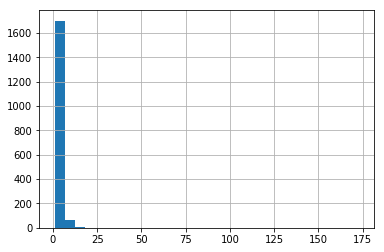

In [29]:
tags.groupby(['userId', 'movieId']).tag.count().hist(bins=30)

# Домашнее задание

In [85]:
filter_genres = ['Action', 'Comedy']
pattern = '|'.join(filter_genres)
joined_ratings = joined_ratings[joined_ratings['genres'].str.contains(pattern)]
joined_ratings.head(20)

,userId,movieId,rating,timestamp,title,genres
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
10,1,163,5.0,964983650,Desperado (1995),Action|Romance|Western
15,1,260,5.0,964981680,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
17,1,316,3.0,964982310,Stargate (1994),Action|Adventure|Sci-Fi
19,1,349,4.0,964982563,Clear and Present Danger (1994),Action|Crime|Drama|Thriller
22,1,367,4.0,964981710,"Mask, The (1994)",Action|Comedy|Crime|Fantasy
23,1,423,3.0,964982363,Blown Away (1994),Action|Thriller


In [86]:
# построим топ фильмов с учётом рейтинга и популярности (по количеству оценок пользователей)
joined_ratings.groupby('title')[['rating']].agg(['mean','count']).sort_values(('rating','mean'), ascending=False).sort_values(('rating', 'count'), ascending=False) 

rating      
                                                        mean count
title                                                             
Matrix, The (1999)                                  4.192446   278
Star Wars: Episode IV - A New Hope (1977)           4.231076   251
Jurassic Park (1993)                                3.750000   238
Braveheart (1995)                                   4.031646   237
Terminator 2: Judgment Day (1991)                   3.970982   224
Fight Club (1999)                                   4.272936   218
Star Wars: Episode V - The Empire Strikes Back ...  4.215640   211
Independence Day (a.k.a. ID4) (1996)                3.445545   202
Raiders of the Lost Ark (Indiana Jones and the ...  4.207500   200
Star Wars: Episode VI - Return of the Jedi (1983)   4.137755   196
Batman (1989)                                       3.428571   189
Saving Private Ryan (1998)                          4.146277   188
Lord of the Rings: The Return of the King, The ...  4.118919   185
True Lies (1994)                                    3.497191   178
Speed (1994)                                        3.529240   171
Gladiator (2000)                                    3.938235   170
Men in Black (a.k.a. MIB) (1997)                    3.487879   165
Mission: Impossible (1996)                          3.537037   162
Mask, The (1994)                                    3.184713   157
Dark Knight, The (2008)                             4.238255   149
Pirates of the Caribbean: The Curse of the Blac...  3.778523   149
Die Hard (1988)                                     3.862069   145
Die Hard: With a Vengeance (1995)                   3.555556   144
Inception (2010)                                    4.066434   143
Princess Bride, The (1987)                          4.232394   142
Indiana Jones and the Last Crusade (1989)           4.046429   140
Stargate (1994)                                     3.375000   140
Star Wars: Episode I - The Phantom Menace (1999)    3.107143   140
Batman Forever (1995)                               2.916058   137
Léon: The Professional (a.k.a. The Professional...  4.018797   133
...                                                      ...   ...
Half a Loaf of Kung Fu (Dian zhi gong fu gan ch...  3.000000     1
Gods and Generals (2003)                            3.000000     1
Protector, The (a.k.a. Warrior King) (Tom yum g...  3.000000     1
El Cid (1961)                                       3.000000     1
LEGO Batman: The Movie - DC Heroes Unite (2013)     3.000000     1
MacGruber (2010)                                    3.000000     1
Batman vs. Robin (2015)                             3.000000     1
Batman: Assault on Arkham (2014)                    3.000000     1
Batman: Mystery of the Batwoman (2003)              3.000000     1
Redbelt (2008)                                      3.000000     1
Power Rangers (2017)                                3.000000     1
One-Armed Swordsman, The (Dubei dao) (1967)         3.000000     1
One Tough Cop (1998)                                3.000000     1
High Heels and Low Lifes (2001)                     3.000000     1
Final Countdown, The (1980)                         3.000000     1
Robin-B-Hood (Bo bui gai wak) (2006)                3.000000     1
Infernal Affairs 2 (Mou gaan dou II) (2003)         3.000000     1
Harsh Times (2006)                                  3.000000     1
Highlander: The Search for Vengeance (2007)         3.000000     1
RoboGeisha (Robo-geisha) (2009)                     3.000000     1
French Connection II (1975)                         3.000000     1
Plunkett & MaCleane (1999)                          3.000000     1
Nicotina (2003)                                     3.000000     1
Princess Blade, The (Shura Yukihime) (2001)         3.000000     1
Hot Lead and Cold Feet (1978)                       3.000000     1
Night to Remember, A (1958)                         3.000000     1
Ninja (2009)                      

Не самая адекватная оценка, т.к. в топ попадают фильмы, которые имеют не самый высокий рейтинг, но при этом популярны у пользователей

Выше мы посчитали оценку с нормированием по количеству оценок, проверим ради интереса, если посчитать с взвешиванием по количеству оценок - будет такой же результат топа или нет

In [87]:
group_title_rating = joined_ratings.groupby(['title','rating'])[['rating']].agg(['count']).sort_values(('rating', 'count'), ascending=False).reset_index()

In [88]:
group_title_rating.columns = ['title', 'rating', 'count']

In [89]:
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [90]:
 df = pd.DataFrame(group_title_rating.groupby("title").apply(wavg, "rating", "count")).reset_index()


In [91]:
df.columns = ['title','weighted_rating']
df.sort_values('weighted_rating', ascending=False)

,title,weighted_rating
909,Knock Off (1998),5.000000
1168,On the Other Side of the Tracks (De l'autre cô...,5.000000
1460,Sonatine (Sonachine) (1993),5.000000
936,Last Hurrah for Chivalry (Hao xia) (1979),5.000000
1423,Shogun Assassin (1980),5.000000
162,Battle Royale 2: Requiem (Batoru rowaiaru II: ...,5.000000
1790,Wonder Woman (2009),5.000000
1252,Priklyucheniya Kapitana Vrungelya (1979),5.000000
1670,Tokyo Tribe (2014),5.000000
989,Love Exposure (Ai No Mukidashi) (2008),5.000000


Жаль, взвешенный рейтинг даёт более точную оценку, но не учитывает общее количество

In [92]:
ratings_mean_count = joined_ratings.groupby('title')[['rating']].agg(['mean','count']).sort_values(('rating','mean'), ascending=False).sort_values(('rating', 'count'), ascending=False).reset_index()
ratings_mean_count.columns = ['title','rating_mean', 'rating_count']
ratings_mean_count.head()

,title,rating_mean,rating_count
0,"Matrix, The (1999)",4.192446,278
1,Star Wars: Episode IV - A New Hope (1977),4.231076,251
2,Jurassic Park (1993),3.750000,238
3,Braveheart (1995),4.031646,237
4,Terminator 2: Judgment Day (1991),3.970982,224


In [93]:
ratings_mean_count['rating_metric_1'] = ratings_mean_count['rating_mean'] * (ratings_mean_count['rating_count'] - mean_num_ratings) / (max_num_ratings - min_num_ratings)

In [94]:
ratings_mean_count.sort_values('rating_metric_1', ascending=False)

,title,rating_mean,rating_count,rating_metric_1
0,"Matrix, The (1999)",4.192446,278,3.420745
1,Star Wars: Episode IV - A New Hope (1977),4.231076,251,3.103975
3,Braveheart (1995),4.031646,237,2.785588
5,Fight Club (1999),4.272936,218,2.704785
2,Jurassic Park (1993),3.750000,238,2.602423
4,Terminator 2: Judgment Day (1991),3.970982,224,2.586287
6,Star Wars: Episode V - The Empire Strikes Back...,4.215640,211,2.578548
8,Raiders of the Lost Ark (Indiana Jones and the...,4.207500,200,2.432464
9,Star Wars: Episode VI - Return of the Jedi (1983),4.137755,196,2.341683
11,Saving Private Ryan (1998),4.146277,188,2.245377


По факту получилось, что двойная сортировка по рейтингу + количеству оценок была не так уж и плоха :)